## Heart Failure Prediction

Installing and importing necessary modules

In [ ]:
!pip install tensorflowjs  pandas tensorflow numpy matplotlib

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
import tensorflowjs as tfjs
import matplotlib as mp

Reading and arranging the data

In [10]:
df = pd.read_csv('data.csv', header=None,skipinitialspace=True,skiprows=1)

In [11]:
# Renaming the columns from numbers to meaningful names
df.rename(columns = {0:"age", 
                     1:"anaemia", 
                     2:"creatinine_phosphokinase",
                     3:"diabetes",
                     4:"ejection_fraction",
                     5:"high_blood_pressure",
                     6:"platelets",
                     7:"serum_creatinine",
                     8:"serum_sodium",
                     9:"sex",
                     10:"smoking",
                     11:"time",
                     12:"DEATH_EVENT"},inplace = True)



Removing unessary data

In [12]:
# Here we are only considering features age,anaemia,diabetes,high_blood_pressure,sex,somking,death_event
# so removing other data
del df["creatinine_phosphokinase"],df["ejection_fraction"],df["platelets"],df["serum_creatinine"],df["time"],df["serum_sodium"]

In [13]:
df.head()

,age,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,75.0,0,0,1,1,0,1
1,55.0,0,0,0,1,0,1
2,65.0,0,0,0,1,1,1
3,50.0,1,0,0,1,0,1
4,65.0,1,1,0,0,0,1


## Separating data into dependent and independent variables

In [14]:
features = df.drop("DEATH_EVENT",axis = 1) # Independent variables

In [15]:
labels = df["DEATH_EVENT"] # Dependent variables

In [24]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.02)

Creating the model

In [25]:
model = tf.keras.Sequential()
model.add(Dense(16,input_dim = len(x_train.axes[1]),activation = "relu"))
model.add(Dense(4,activation  ="relu"))
model.add(Dense(1,activation="sigmoid")) 

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


Configuring and training the model

In [26]:
model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics=['accuracy'])

In [27]:
model.fit(x = x_train,y=y_train,epochs = 1000,verbose=0)

Converting the model to tfjs

In [21]:
tfjs.converters.save_keras_model(model,'models')

## Graphs
Plotting the graph on basis what model learned


In [57]:
#Anaemia = 0
#Diabetes = 0
#High bp = 0
#Smoking = 0 
#Gender = 1
xAgeOff = []
yPercentOff = []
for i in range(40,96): # The data's max age is 95 whil minimum is 40
  xAgeOff.append(i)
  yPercentOff.append(model.predict([[i,0,0,0,1,0]])*100)

yPercentOff = np.array(yPercentOff)
yPercentOff = yPercentOff.ravel()

In [58]:
#Anaemia = 1
#Diabetes = 1
#High bp = 1
#Smoking = 1 
#Gender = 1
xAgeOn = []
yPercentOn = []
for i in range(40,96): # The data's max age is 95 whil minimum is 40
  xAgeOn.append(i)
  yPercentOn.append(model.predict([[i,1,1,1,1,1]])*100)

yPercentOn = np.array(yPercentOn)
yPercentOn = yPercentOn.ravel()

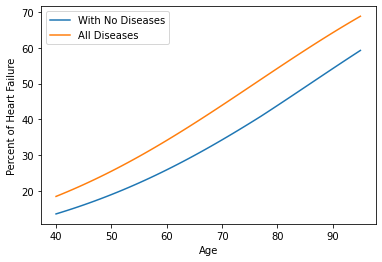

In [68]:
mp.pyplot.plot(xAgeOff,yPercentOff,label="With No Diseases")
mp.pyplot.plot(xAgeOn,yPercentOn,label="All Diseases")

mp.pyplot.xlabel("Age")
mp.pyplot.ylabel("Percent of Heart Failure")
mp.pyplot.legend()


Individual effect of each feature


In [63]:
#Anaemia = 1
#Diabetes = 0
#High bp = 0
#Smoking = 0 
#Gender = 1
xAgeOnlyAnaemia = []
yPercentOnlyAnaemia = []
for i in range(40,96): # The data's max age is 95 whil minimum is 40
  xAgeOnlyAnaemia.append(i)
  yPercentOnlyAnaemia.append(model.predict([[i,1,0,0,1,0]])*100)

yPercentOnlyAnaemia = np.array(yPercentOnlyAnaemia)
yPercentOnlyAnaemia = yPercentOnlyAnaemia.ravel()

In [64]:
#Anaemia = 0
#Diabetes = 1
#High bp = 0
#Smoking = 0 
#Gender = 0
xAgeOnlyDiabetes = []
yPercentOnlyDiabetes = []
for i in range(40,96): # The data's max age is 95 whil minimum is 40
  xAgeOnlyDiabetes.append(i)
  yPercentOnlyDiabetes.append(model.predict([[i,0,1,0,1,0]])*100)

yPercentOnlyDiabetes = np.array(yPercentOnlyDiabetes)
yPercentOnlyDiabetes = yPercentOnlyDiabetes.ravel()

In [65]:
#Anaemia = 0
#Diabetes = 0
#High bp = 1
#Smoking = 0
#Gender = 1
xAgeOnlyBp = []
yPercentOnlyBp = []
for i in range(40,96): # The data's max age is 95 whil minimum is 40
  xAgeOnlyBp.append(i)
  yPercentOnlyBp.append(model.predict([[i,0,0,1,1,0]])*100)

yPercentOnlyBp = np.array(yPercentOnlyBp)
yPercentOnlyBp = yPercentOnlyBp.ravel()

In [66]:
#Anaemia = 0
#Diabetes = 0
#High bp = 0
#Smoking = 1
#Gender = 1
xAgeOnlySmoking = []
yPercentOnlySmoking = []
for i in range(40,96): # The data's max age is 95 whil minimum is 40
  xAgeOnlySmoking.append(i)
  yPercentOnlySmoking.append(model.predict([[i,0,0,0,1,1]])*100)

yPercentOnlySmoking = np.array(yPercentOnlySmoking)
yPercentOnlySmoking = yPercentOnlySmoking.ravel()

Text(0, 0.5, 'Percent of Heart Failure')

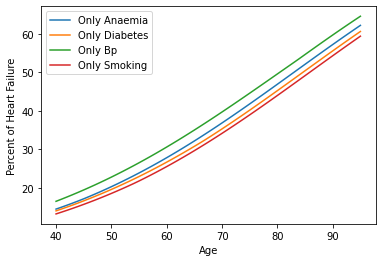

In [69]:
mp.pyplot.plot(xAgeOnlyAnaemia,yPercentOnlyAnaemia,label="Only Anaemia")
mp.pyplot.plot(xAgeOnlyDiabetes,yPercentOnlyDiabetes,label="Only Diabetes")
mp.pyplot.plot(xAgeOnlyBp,yPercentOnlyBp,label="Only Bp")
mp.pyplot.plot(xAgeOnlySmoking,yPercentOnlySmoking,label="Only Smoking")
mp.pyplot.legend()
mp.pyplot.xlabel("Age")
mp.pyplot.ylabel("Percent of Heart Failure")